[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/CV/blob/main/data_augmentation/ae/ae_ffnn.ipynb)


In [1]:
import torch
import cv2
import torchvision
import torch.nn as nn
import numpy as np
from tqdm import tqdm
from torch.optim import Adam
from matplotlib import pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


# **Dataset**

In [3]:
from torchvision import datasets, transforms
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) # Define the transformation to normalize the data between 1 and -1 (mean = 0.5 and variance = 0.5 will transform to values between 1 and -1)
mnist = datasets.MNIST(root='./data', train=True, transform=transform, download=True) # downloading the MNIST train dataset and then applying some transformations
mnist_loader = DataLoader(dataset=mnist, batch_size=64, shuffle=True, num_workers=0) # loading the downloaded dataset

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 20196031.13it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 634856.47it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5661528.75it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8011155.92it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# **Modelling**

In [21]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),nn.ReLU(),
            nn.Linear(128, 64),nn.ReLU(),
            nn.Linear(64, 12),nn.ReLU(),
            nn.Linear(12, 3)
        )

        self.decoder = nn.Sequential(
            nn.Linear(3, 12),nn.ReLU(),
            nn.Linear(12, 64),nn.ReLU(),
            nn.Linear(64, 128),nn.ReLU(),
            nn.Linear(128, 28 * 28),nn.Tanh() #cause images range from [-1,1], if [0,1] then use sigmoid
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# **Training**

In [8]:
model = Autoencoder().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

In [9]:
for epoch_idx in range(40): # Run training for 10 epochs

    losses = []

    for im, _ in tqdm(mnist_loader):

        im = im.float().to(device)

        # image flattening
        im = im.reshape(-1, 28*28)

        optimizer.zero_grad()

        # passing to model
        out = model(im)

        # loss calculation
        loss = nn.MSELoss()(im, out)

        # housekeeping
        losses.append(loss.item())

        loss.backward()
        optimizer.step()

    print(f'''Finished epoch:{epoch_idx+1} | KL Loss : {np.mean(losses)} ''')

100%|██████████| 938/938 [00:23<00:00, 40.30it/s]


Finished epoch:1 | KL Loss : 0.22287793274817944 


100%|██████████| 938/938 [00:28<00:00, 33.23it/s]


Finished epoch:2 | KL Loss : 0.16905350447781303 


100%|██████████| 938/938 [00:46<00:00, 20.22it/s]


Finished epoch:3 | KL Loss : 0.15700866267688748 


100%|██████████| 938/938 [00:42<00:00, 21.88it/s]


Finished epoch:4 | KL Loss : 0.15120443601661654 


100%|██████████| 938/938 [00:44<00:00, 20.87it/s]


Finished epoch:5 | KL Loss : 0.14720391292275906 


100%|██████████| 938/938 [00:46<00:00, 20.34it/s]


Finished epoch:6 | KL Loss : 0.14402699895473178 


100%|██████████| 938/938 [00:47<00:00, 19.65it/s]


Finished epoch:7 | KL Loss : 0.1417292004296266 


100%|██████████| 938/938 [00:51<00:00, 18.17it/s]


Finished epoch:8 | KL Loss : 0.13965779631090824 


100%|██████████| 938/938 [00:59<00:00, 15.87it/s]


Finished epoch:9 | KL Loss : 0.13811848998101536 


100%|██████████| 938/938 [01:02<00:00, 14.95it/s]


Finished epoch:10 | KL Loss : 0.13678730915445508 


100%|██████████| 938/938 [01:02<00:00, 14.90it/s]


Finished epoch:11 | KL Loss : 0.13565921477639853 


100%|██████████| 938/938 [00:53<00:00, 17.65it/s]


Finished epoch:12 | KL Loss : 0.1347117159825398 


100%|██████████| 938/938 [00:48<00:00, 19.26it/s]


Finished epoch:13 | KL Loss : 0.1339644370620439 


100%|██████████| 938/938 [00:48<00:00, 19.48it/s]


Finished epoch:14 | KL Loss : 0.13308162277917873 


100%|██████████| 938/938 [00:47<00:00, 19.54it/s]


Finished epoch:15 | KL Loss : 0.1322898087359822 


100%|██████████| 938/938 [00:44<00:00, 20.94it/s]


Finished epoch:16 | KL Loss : 0.13160275933203666 


100%|██████████| 938/938 [00:47<00:00, 19.75it/s]


Finished epoch:17 | KL Loss : 0.1311423722297144 


100%|██████████| 938/938 [00:50<00:00, 18.58it/s]


Finished epoch:18 | KL Loss : 0.1305389913049207 


100%|██████████| 938/938 [00:52<00:00, 17.76it/s]


Finished epoch:19 | KL Loss : 0.13004477912270185 


100%|██████████| 938/938 [00:57<00:00, 16.26it/s]


Finished epoch:20 | KL Loss : 0.12969250896814535 


100%|██████████| 938/938 [00:57<00:00, 16.45it/s]


Finished epoch:21 | KL Loss : 0.12923241611609834 


100%|██████████| 938/938 [00:53<00:00, 17.42it/s]


Finished epoch:22 | KL Loss : 0.12890667057653735 


100%|██████████| 938/938 [00:48<00:00, 19.37it/s]


Finished epoch:23 | KL Loss : 0.128611079125262 


100%|██████████| 938/938 [00:43<00:00, 21.34it/s]


Finished epoch:24 | KL Loss : 0.12853244797729735 


100%|██████████| 938/938 [00:45<00:00, 20.55it/s]


Finished epoch:25 | KL Loss : 0.1279735266526879 


100%|██████████| 938/938 [00:42<00:00, 22.15it/s]


Finished epoch:26 | KL Loss : 0.12775396160098282 


100%|██████████| 938/938 [00:46<00:00, 20.28it/s]


Finished epoch:27 | KL Loss : 0.12742371087484777 


100%|██████████| 938/938 [00:49<00:00, 19.07it/s]


Finished epoch:28 | KL Loss : 0.12713945193140747 


100%|██████████| 938/938 [00:51<00:00, 18.15it/s]


Finished epoch:29 | KL Loss : 0.12686322250568283 


100%|██████████| 938/938 [00:57<00:00, 16.42it/s]


Finished epoch:30 | KL Loss : 0.12684001301778658 


100%|██████████| 938/938 [00:54<00:00, 17.27it/s]


Finished epoch:31 | KL Loss : 0.12666372693519093 


100%|██████████| 938/938 [00:43<00:00, 21.42it/s]


Finished epoch:32 | KL Loss : 0.1264844195865619 


100%|██████████| 938/938 [00:44<00:00, 21.20it/s]


Finished epoch:33 | KL Loss : 0.12621209830013927 


100%|██████████| 938/938 [00:47<00:00, 19.86it/s]


Finished epoch:34 | KL Loss : 0.12614529065168234 


100%|██████████| 938/938 [00:46<00:00, 20.06it/s]


Finished epoch:35 | KL Loss : 0.12587853901580706 


100%|██████████| 938/938 [00:47<00:00, 19.57it/s]


Finished epoch:36 | KL Loss : 0.1258244687623815 


100%|██████████| 938/938 [00:46<00:00, 20.28it/s]


Finished epoch:37 | KL Loss : 0.12570330990688888 


100%|██████████| 938/938 [00:46<00:00, 20.34it/s]


Finished epoch:38 | KL Loss : 0.12542569465728712 


100%|██████████| 938/938 [00:50<00:00, 18.56it/s]


Finished epoch:39 | KL Loss : 0.1252275320417337 


100%|██████████| 938/938 [00:51<00:00, 18.06it/s]

Finished epoch:40 | KL Loss : 0.12507265234298542 


# **Inference**

In [22]:
# Getting 100 random indexes
idxs = torch.randint(0, len(mnist)-1, (10, ))

# using these indexes to get images from mnist dataset and concatenating them
test_ims = torch.cat([mnist[idx][0][None, :] for idx in idxs]).float()

# test image flattening
test_ims = test_ims.reshape(-1, 28*28)

# generating images for the above test dataset
generated_im = model(test_ims.to(device))

In [23]:
generated_im = torch.clamp(generated_im, -1., 1.).detach().cpu() # clamping the generated images
generated_im = 0.5*generated_im + 0.5 #detransforming the images from [-1,1] to [0,1]

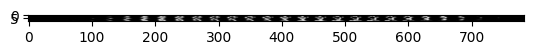

In [18]:
# now printing the predicted images
grid = torchvision.utils.make_grid(generated_im, nrow=1)
img = torchvision.transforms.ToPILImage()(grid)
plt.imshow(img, cmap='gray')